---
### Universidad de Costa Rica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas
---

- Estudiantes: **Meybelle Castro Valverde, Rolando Murillo Pérez, Gokeh Ávila Blanco**
- Carné: **B91887, B54966, B50747**
- Grupo: **1/2**


# P5 - *Procesos M/M/s*


---

Es menester tomar una decisión con respecto al número de "servidores" necesarios para cierto proceso de vacunación, de forma tal que el sistema no exceda 100 personas en fila durante el 95% del tiempo de servicio. 

En un estudio de afluencia y del tiempo de servicio se asumen y determinan los siguientes parámetros:

- La tasa de llegada $\lambda$ es constante durante ocho horas de funcionamiento y tiene un valor de $\lambda = 7$ personas por minuto.

- La tasa de servicio $\nu$ de cada "servidor" (es decir, personal de salud tomando datos y vacunando) es constante durante ocho horas de funcionamiento y tiene un valor de $\nu = 0.25$ personas por minuto.

Entonces,
#### Primera parte
- (40%) Hacer la determinación teórica del número $s$ de servidores necesarios para cumplir el requisito.

La ecuación para $\rho$ es:

$$
\rho= \frac{\lambda}{sv}
$$

Sustituímos con los valores anteriormente mencionados:

$$
\rho= \frac{7}{s0.25} = \frac{28}{s}
$$

Entonces, considerando la suma de probabilidad de estado estable, donde se toma la consideración de las 100 personas, y ésta no debe superar el 95% del tiempo, por lo tanto la condición de ruptura menor que no supere el 5% es:

$$
P( \text{101 o más clientes en el sistema} ) = \sum_{i=101}^{\infty} (1 - \rho) \rho^i  = 1 - \sum_{i=0}^{100} (1 - \rho) \rho^i = \rho^{100}
$$

Si sustituímos el valor de \rho en la ecuación anterior, se tiene que:

$$
\rho^{101} \leq 0.05
$$
.
$$
\left(\frac{28}{s}\right)^{101} \leq 0.05
$$
.
$$
\frac{28^{101}}{s^{101}} \leq 0.05
$$
.
$$
\frac{28^{101}}{0.05} \leq s^{101}
$$
.
$$
\sqrt[101]{\frac{28^{101}}{0.05}} \leq s
$$
.
$$
28\sqrt[101]{\frac{1}{0.05}} \leq s
$$
.
$$
28.8429 \leq s
$$
.
#### Segunda parte
- (60%) Modificar el código provisto para simular y corroborar el resultado anterior y crear al menos dos gráficas que muestren esta simulación.

#### Primer caso:  $s \geq 28.8429$

Parámetro lambda = 7.0
Parámetro nu = 0.25
Servidores s = 29
Tiempo con igual a 100 solicitudes en fila:
	 100.00%
	 Sí cumple con la especificación.
Simulación es equivalente a 5.06 horas.


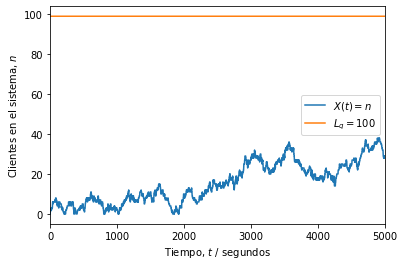

In [26]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Número de clientes
N = 2000

# Parámetro de llegada (clientes/segundos)
lam = 7/60

# Parámetro de servicio (servicios/segundos)
nu = 0.25/60

# Distribución de los tiempos de llegada entre cada cliente
X = stats.expon(scale = 1/lam)

# Distribución de los tiempos de servicio a cada cliente
Y = stats.expon(scale = 1/(29*nu))

# Intervalos entre llegadas (segundos desde último cliente)
t_intervalos = np.ceil(X.rvs(N)).astype('int')

# Tiempos de las llegadas (segundos desde el inicio)
t_llegadas = [t_intervalos[0]]
for i in range(1, len(t_intervalos)):
    siguiente = t_llegadas[i-1] + t_intervalos[i]
    t_llegadas.append(siguiente)

# Tiempos de servicio (segundos desde inicio de servicio)
t_servicio = np.ceil(Y.rvs(N)).astype('int')

# Inicialización del tiempo de inicio y fin de atención
inicio = t_llegadas[0]          # primera llegada
fin = inicio + t_servicio[0]    # primera salida

# Tiempos en que recibe atención cada i-ésimo cliente (!= que llega)
t_atencion = [inicio]
for i in range(1, N):
    inicio = np.max((t_llegadas[i], fin))
    fin = inicio + t_servicio[i]
    t_atencion.append(inicio)

# Inicialización del vector temporal para registrar eventos
t = np.zeros(t_atencion[-1] + t_servicio[-1] + 1)

# Asignación de eventos de llegada (+1) y salida (-1) de clientes
for c in range(N):
    i = t_llegadas[c]
    t[i] += 1
    j = t_atencion[c] + t_servicio[c]
    t[j] -= 1

# Umbral de P o más personas en sistema (hay P - 1 en fila)
P = 100

# Instantes (segundos) de tiempo con P o más solicitudes en sistema
exceso = 0

# Proceso aleatorio (estados n = {0, 1, 2...})
Xt = np.zeros(t.shape)

# Inicialización de estado n
n = 0

# Recorrido del vector temporal y conteo de clientes (estado n)
for i, c in enumerate(t):
    n += c # sumar (+1) o restar (-1) al estado
    Xt[i] = n
    if Xt[i] <= P: 
        exceso += 1

# Fracción de tiempo con P o más solicitudes en sistema
fraccion = exceso / len(t)

# Resultados
print('Parámetro lambda =', str(lam*60))
print('Parámetro nu =', str(nu*60))
print('Servidores s =', str(29))
print('Tiempo con igual a {} solicitudes en fila:'.format(P))
print('\t {:0.2f}%'.format(100*fraccion))
if fraccion >= 0.95:
    print('\t Sí cumple con la especificación.')
else:
    print('\t No cumple con la especificación.') 
print('Simulación es equivalente a {:0.2f} horas.'.format(len(t)/3600))

# Gráfica de X(t) (estados del sistema)
plt.figure()
plt.plot(Xt)
plt.plot(range(len(t)), (P-1)*np.ones(t.shape))
plt.legend(('$X(t) = n$', '$L_q = $' + str(P)))
plt.ylabel('Clientes en el sistema, $n$')
plt.xlabel('Tiempo, $t$ / segundos')
plt.xlim((0, 5000))
plt.show()

Se observa que sí cumple con los requisitos, ya que $s = 29 \geq 28.8429$, tal y como lo estipula la teoría.

.

#### Segundo caso:  $s \geq 28.8429$

Parámetro lambda = 7.0
Parámetro nu = 0.25
Servidores s = 65
Tiempo con igual a 100 solicitudes en fila:
	 100.00%
	 Sí cumple con la especificación.
Simulación es equivalente a 5.08 horas.


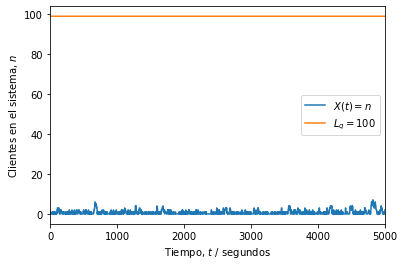

In [29]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Número de clientes
N = 2000

# Parámetro de llegada (clientes/segundos)
lam = 7/60

# Parámetro de servicio (servicios/segundos)
nu = 0.25/60

# Distribución de los tiempos de llegada entre cada cliente
X = stats.expon(scale = 1/lam)

# Distribución de los tiempos de servicio a cada cliente
Y = stats.expon(scale = 1/(65*nu))

# Intervalos entre llegadas (segundos desde último cliente)
t_intervalos = np.ceil(X.rvs(N)).astype('int')

# Tiempos de las llegadas (segundos desde el inicio)
t_llegadas = [t_intervalos[0]]
for i in range(1, len(t_intervalos)):
    siguiente = t_llegadas[i-1] + t_intervalos[i]
    t_llegadas.append(siguiente)

# Tiempos de servicio (segundos desde inicio de servicio)
t_servicio = np.ceil(Y.rvs(N)).astype('int')

# Inicialización del tiempo de inicio y fin de atención
inicio = t_llegadas[0]          # primera llegada
fin = inicio + t_servicio[0]    # primera salida

# Tiempos en que recibe atención cada i-ésimo cliente (!= que llega)
t_atencion = [inicio]
for i in range(1, N):
    inicio = np.max((t_llegadas[i], fin))
    fin = inicio + t_servicio[i]
    t_atencion.append(inicio)

# Inicialización del vector temporal para registrar eventos
t = np.zeros(t_atencion[-1] + t_servicio[-1] + 1)

# Asignación de eventos de llegada (+1) y salida (-1) de clientes
for c in range(N):
    i = t_llegadas[c]
    t[i] += 1
    j = t_atencion[c] + t_servicio[c]
    t[j] -= 1

# Umbral de P o más personas en sistema (hay P - 1 en fila)
P = 100

# Instantes (segundos) de tiempo con P o más solicitudes en sistema
exceso = 0

# Proceso aleatorio (estados n = {0, 1, 2...})
Xt = np.zeros(t.shape)

# Inicialización de estado n
n = 0

# Recorrido del vector temporal y conteo de clientes (estado n)
for i, c in enumerate(t):
    n += c # sumar (+1) o restar (-1) al estado
    Xt[i] = n
    if Xt[i] <= P: 
        exceso += 1

# Fracción de tiempo con P o más solicitudes en sistema
fraccion = exceso / len(t)

# Resultados
print('Parámetro lambda =', str(lam*60))
print('Parámetro nu =', str(nu*60))
print('Servidores s =', str(65))
print('Tiempo con igual a {} solicitudes en fila:'.format(P))
print('\t {:0.2f}%'.format(100*fraccion))
if fraccion >= 0.95:
    print('\t Sí cumple con la especificación.')
else:
    print('\t No cumple con la especificación.') 
print('Simulación es equivalente a {:0.2f} horas.'.format(len(t)/3600))

# Gráfica de X(t) (estados del sistema)
plt.figure()
plt.plot(Xt)
plt.plot(range(len(t)), (P-1)*np.ones(t.shape))
plt.legend(('$X(t) = n$', '$L_q = $' + str(P)))
plt.ylabel('Clientes en el sistema, $n$')
plt.xlabel('Tiempo, $t$ / segundos')
plt.xlim((0, 5000))
plt.show()

Se observa que sí cumple con los requisitos, ya que $s = 65 \geq 28.8429$, tal y como lo estipula la teoría.

.

#### Tercer caso:  $s < 28.8429$

Parámetro lambda = 7.0
Parámetro nu = 0.25
Servidores s = 10
Tiempo con igual a 100 solicitudes en fila:
	 7.94%
	 No cumple con la especificación.
Simulación es equivalente a 13.59 horas.


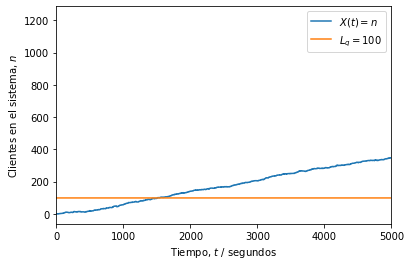

In [28]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Número de clientes
N = 2000

# Parámetro de llegada (clientes/segundos)
lam = 7/60

# Parámetro de servicio (servicios/segundos)
nu = 0.25/60

# Distribución de los tiempos de llegada entre cada cliente
X = stats.expon(scale = 1/lam)

# Distribución de los tiempos de servicio a cada cliente
Y = stats.expon(scale = 1/(10*nu))

# Intervalos entre llegadas (segundos desde último cliente)
t_intervalos = np.ceil(X.rvs(N)).astype('int')

# Tiempos de las llegadas (segundos desde el inicio)
t_llegadas = [t_intervalos[0]]
for i in range(1, len(t_intervalos)):
    siguiente = t_llegadas[i-1] + t_intervalos[i]
    t_llegadas.append(siguiente)

# Tiempos de servicio (segundos desde inicio de servicio)
t_servicio = np.ceil(Y.rvs(N)).astype('int')

# Inicialización del tiempo de inicio y fin de atención
inicio = t_llegadas[0]          # primera llegada
fin = inicio + t_servicio[0]    # primera salida

# Tiempos en que recibe atención cada i-ésimo cliente (!= que llega)
t_atencion = [inicio]
for i in range(1, N):
    inicio = np.max((t_llegadas[i], fin))
    fin = inicio + t_servicio[i]
    t_atencion.append(inicio)

# Inicialización del vector temporal para registrar eventos
t = np.zeros(t_atencion[-1] + t_servicio[-1] + 1)

# Asignación de eventos de llegada (+1) y salida (-1) de clientes
for c in range(N):
    i = t_llegadas[c]
    t[i] += 1
    j = t_atencion[c] + t_servicio[c]
    t[j] -= 1

# Umbral de P o más personas en sistema (hay P - 1 en fila)
P = 100

# Instantes (segundos) de tiempo con P o más solicitudes en sistema
exceso = 0

# Proceso aleatorio (estados n = {0, 1, 2...})
Xt = np.zeros(t.shape)

# Inicialización de estado n
n = 0

# Recorrido del vector temporal y conteo de clientes (estado n)
for i, c in enumerate(t):
    n += c # sumar (+1) o restar (-1) al estado
    Xt[i] = n
    if Xt[i] <= P: 
        exceso += 1

# Fracción de tiempo con P o más solicitudes en sistema
fraccion = exceso / len(t)

# Resultados
print('Parámetro lambda =', str(lam*60))
print('Parámetro nu =', str(nu*60))
print('Servidores s =', str(10))
print('Tiempo con igual a {} solicitudes en fila:'.format(P))
print('\t {:0.2f}%'.format(100*fraccion))
if fraccion >= 0.95:
    print('\t Sí cumple con la especificación.')
else:
    print('\t No cumple con la especificación.') 
print('Simulación es equivalente a {:0.2f} horas.'.format(len(t)/3600))

# Gráfica de X(t) (estados del sistema)
plt.figure()
plt.plot(Xt)
plt.plot(range(len(t)), (P-1)*np.ones(t.shape))
plt.legend(('$X(t) = n$', '$L_q = $' + str(P)))
plt.ylabel('Clientes en el sistema, $n$')
plt.xlabel('Tiempo, $t$ / segundos')
plt.xlim((0, 5000))
plt.show()

Se observa que no cumple con los requisitos, ya que $s = 10 < 28.8429$, tal y como lo estipula la teoría.

Finalmente se puede observar entonces que para el caso en que se tienen 29 servidores se cumplen con los requisitos pero si nos vamos a un valor menor se complica cumplir con las asignaciones.
Para el caso de 29 servidores se puede decir que se pueden manejar de manera eficiente la cantidad de personas por minuto que se requieren atender, aunque si la tasa de personas aumentara es posible que la cantidad de servidores ahora quede limitada, por lo que siempre es bueno sobredimensionar el sistema con tal de que las saturaciones no se den. 
También en situaciones donde la cantidad de servidores disponibles sea una limitante lo que se podría regular es la cantidad de personas que se atienden por hora.

#### Sobre la presentación

.

---

**Universidad de Costa Rica**

Facultad de Ingeniería

Escuela de Ingeniería Eléctrica

---